In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df = pd.read_csv('data/csv/newPasig_saved_coordinates.csv')

In [3]:
geometry = gpd.points_from_xy(df['X'], df['Y'], crs="EPSG:4326")
street_points = gpd.GeoDataFrame(geometry=geometry)  
street_points

,geometry
0,POINT (121.06392 14.61466)
1,POINT (121.06519 14.61323)
2,POINT (121.06445 14.60089)
3,POINT (121.06548 14.56409)
4,POINT (121.08611 14.60407)
...,...
475,POINT (121.08500 14.58888)
476,POINT (121.06646 14.56766)
477,POINT (121.08537 14.54345)
478,POINT (121.06575 14.56597)


In [4]:
street_points.insert(0, 'point_id', range(0, 0 + len(street_points)))

<AxesSubplot: >

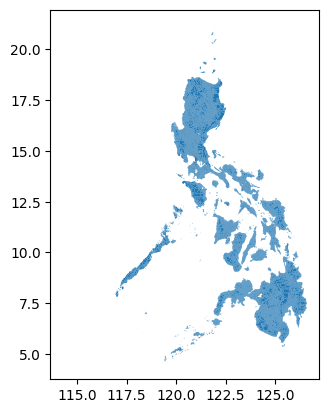

In [5]:
philippines = gpd.read_file('maps/phl_admbnda_adm4_psa_namria_20231106.zip')
philippines.plot()

In [6]:
philippines.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

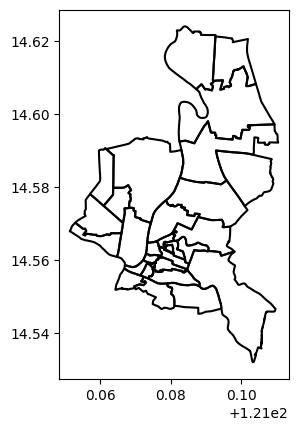

In [7]:
# pasig = philippines[philippines['ADM3_EN'] == 'City of Pasig']
pasig = philippines[philippines['ADM3_EN'] == 'City of Pasig']
pasig.boundary.plot(edgecolor='black')

In [8]:
pasig.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
pasig.shape

(30, 18)

In [10]:
pasig.head()

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
34727,Bagong Ilog,PH1307403001,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574..."
34728,Bagong Katipunan,PH1307403002,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.008178,0.000002,0.022305,"POLYGON ((121.07557 14.55938, 121.07565 14.559..."
34729,Bambang,PH1307403003,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.037444,0.000044,0.521039,"POLYGON ((121.08183 14.55734, 121.08205 14.557..."
34730,Buting,PH1307403004,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.025904,0.000029,0.348487,"POLYGON ((121.06733 14.55742, 121.06791 14.557..."
34731,Caniogan,PH1307403005,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.048018,0.000088,1.043965,"POLYGON ((121.07887 14.57603, 121.07900 14.575..."


<AxesSubplot: >

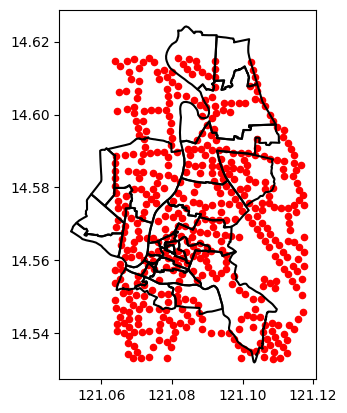

In [11]:
base = pasig.boundary.plot(edgecolor='black')
street_points.plot(ax=base, markersize=20, color='red')

In [12]:
clipped = gpd.clip(street_points, pasig)
clipped

,point_id,geometry
448,448,POINT (121.08168 14.54853)
414,414,POINT (121.07888 14.54862)
447,447,POINT (121.08157 14.55035)
413,413,POINT (121.07891 14.55074)
389,389,POINT (121.07679 14.55090)
...,...,...
23,23,POINT (121.08724 14.61291)
479,479,POINT (121.08678 14.61478)
473,473,POINT (121.08482 14.61516)
450,450,POINT (121.08302 14.61382)


<AxesSubplot: >

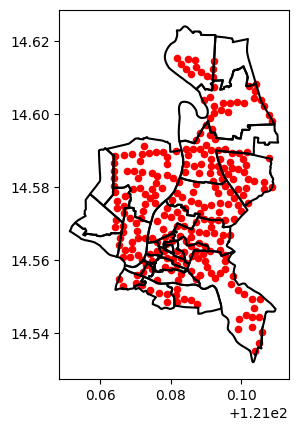

In [13]:
base = pasig.boundary.plot(edgecolor='black')
clipped.plot(ax=base, markersize=20, color='red')

In [14]:
len(clipped)

266

In [15]:
clipped.geometry.y

448    14.548533
414    14.548625
447    14.550355
413    14.550738
389    14.550901
         ...    
23     14.612915
479    14.614782
473    14.615163
450    14.613821
435    14.615457
Length: 266, dtype: float64

In [16]:
df = pd.DataFrame({'X': clipped.geometry.x, 'Y': clipped.geometry.y})
df.to_csv('data/csv/pasig_filtered_coordinates.csv', index=False)

In [17]:
joined = gpd.sjoin(street_points, pasig, how='left', predicate='within')
joined.head()

,point_id,geometry,index_right,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM
0,0,POINT (121.06392 14.61466),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,POINT (121.06519 14.61323),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,POINT (121.06445 14.60089),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,POINT (121.06548 14.56409),34727.0,Bagong Ilog,PH1307403001,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.044006,0.000102,1.212769
4,4,POINT (121.08611 14.60407),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
joined.shape

(480, 20)

In [19]:
joined = gpd.sjoin(pasig, street_points, how='left', predicate='contains')
joined.head()

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,index_right,point_id
34727,Bagong Ilog,PH1307403001,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",10.0,10.0
34727,Bagong Ilog,PH1307403001,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",272.0,272.0
34727,Bagong Ilog,PH1307403001,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",341.0,341.0
34727,Bagong Ilog,PH1307403001,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",319.0,319.0
34727,Bagong Ilog,PH1307403001,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",318.0,318.0


In [20]:
joined.shape

(270, 20)

In [21]:
joined[joined['ADM4_EN'] == 'Pineda']

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,index_right,point_id
34742,Pineda,PH1307403016,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.042084,0.000049,0.581491,"POLYGON ((121.05299 14.57029, 121.05301 14.570...",478.0,478.0


In [22]:
joined['ADM4_EN'].value_counts()

Ugong                 36
Pinagbuhatan          31
Rosario               26
Maybunga              26
Santa Lucia           22
Manggahan             20
San Miguel            17
Bagong Ilog           15
Santolan              11
Caniogan              10
Kalawaan               6
Oranbo                 6
Buting                 5
San Nicolas (Pob.)     5
San Joaquin            4
Palatiw                4
Bambang                3
Dela Paz               3
Sumilang               3
Santo Tomas            3
Kapitolyo              2
Malinao                2
Sagad                  2
Kapasigan              2
San Jose               1
Santa Cruz             1
Santa Rosa             1
San Antonio            1
Bagong Katipunan       1
Pineda                 1
Name: ADM4_EN, dtype: int64

In [23]:
grouped = joined.groupby('ADM4_EN')['point_id'].count().sort_values(ascending=True)
grouped

ADM4_EN
Ugong                 36
Pinagbuhatan          31
Rosario               26
Maybunga              26
Santa Lucia           22
Manggahan             20
San Miguel            17
Bagong Ilog           15
Santolan              11
Caniogan              10
Kalawaan               6
Oranbo                 6
Buting                 5
San Nicolas (Pob.)     5
San Joaquin            4
Palatiw                4
Sumilang               3
Dela Paz               3
Santo Tomas            3
Bambang                3
Kapitolyo              2
Malinao                2
Sagad                  2
Kapasigan              2
San Jose               1
Pineda                 1
Santa Cruz             0
San Antonio            0
Santa Rosa             0
Bagong Katipunan       0
Name: point_id, dtype: int64

<AxesSubplot: ylabel='ADM4_EN'>

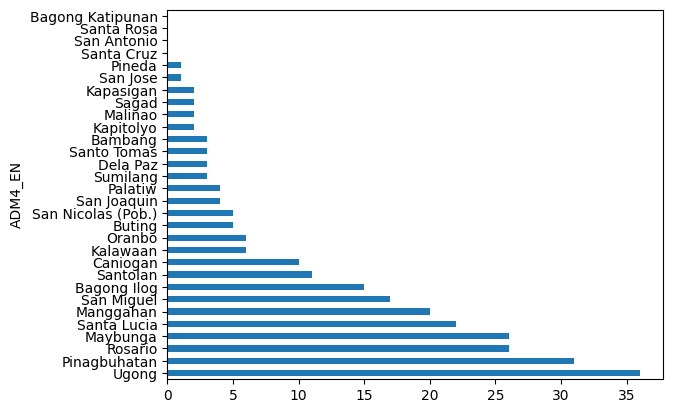

In [24]:
grouped.plot.barh()

In [25]:
type(y)

pandas.core.series.Series

In [26]:
total_street_points = joined.groupby('ADM4_EN')['point_id'].count().sum()
total_street_points

266

In [27]:
pasig.set_index('ADM4_EN', inplace=True)
pasig.head()

,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
ADM4_EN,,,,,,,,,,,,,,,,,
Bagong Ilog,PH1307403001,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574..."
Bagong Katipunan,PH1307403002,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.008178,0.000002,0.022305,"POLYGON ((121.07557 14.55938, 121.07565 14.559..."
Bambang,PH1307403003,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.037444,0.000044,0.521039,"POLYGON ((121.08183 14.55734, 121.08205 14.557..."
Buting,PH1307403004,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.025904,0.000029,0.348487,"POLYGON ((121.06733 14.55742, 121.06791 14.557..."
Caniogan,PH1307403005,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.048018,0.000088,1.043965,"POLYGON ((121.07887 14.57603, 121.07900 14.575..."


In [28]:
# pasig['streetimage_count'] = joined['ADM4_EN'].value_counts()
pasig['streetimage_count'] = joined.groupby('ADM4_EN')['point_id'].count().sort_values(ascending=False)
# pasig['streetimage_count'] = y
pasig.head()

c:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,streetimage_count
ADM4_EN,,,,,,,,,,,,,,,,,,
Bagong Ilog,PH1307403001,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",15
Bagong Katipunan,PH1307403002,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.008178,0.000002,0.022305,"POLYGON ((121.07557 14.55938, 121.07565 14.559...",0
Bambang,PH1307403003,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.037444,0.000044,0.521039,"POLYGON ((121.08183 14.55734, 121.08205 14.557...",3
Buting,PH1307403004,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.025904,0.000029,0.348487,"POLYGON ((121.06733 14.55742, 121.06791 14.557...",5
Caniogan,PH1307403005,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.048018,0.000088,1.043965,"POLYGON ((121.07887 14.57603, 121.07900 14.575...",10


<AxesSubplot: >

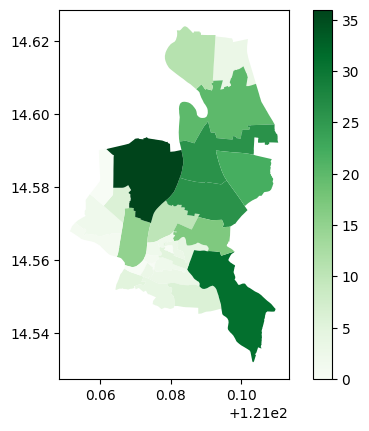

In [29]:
pasig.plot(column='streetimage_count', cmap='Greens', legend=True)

In [30]:
pasig.reset_index(inplace=True)
pasig.head()

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry,streetimage_count
0,Bagong Ilog,PH1307403001,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574...",15
1,Bagong Katipunan,PH1307403002,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.008178,0.000002,0.022305,"POLYGON ((121.07557 14.55938, 121.07565 14.559...",0
2,Bambang,PH1307403003,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.037444,0.000044,0.521039,"POLYGON ((121.08183 14.55734, 121.08205 14.557...",3
3,Buting,PH1307403004,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.025904,0.000029,0.348487,"POLYGON ((121.06733 14.55742, 121.06791 14.557...",5
4,Caniogan,PH1307403005,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.048018,0.000088,1.043965,"POLYGON ((121.07887 14.57603, 121.07900 14.575...",10
